# Importing modules and settings

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

In [ ]:
from matplotlib.pyplot import rc_context

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

General settings of Scanpy

In [ ]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')


scanpy==1.9.3 anndata==0.8.0 umap==0.5.2 numpy==1.23.5 scipy==1.9.3 pandas==1.4.3 scikit-learn==1.2.2 statsmodels==0.13.5 python-igraph==0.9.8 louvain==0.7.1 pynndescent==0.5.5


In [ ]:
umap_cmap = sns.blend_palette(['xkcd:light grey', 'xkcd:azure'], as_cmap = True)

# Declaring the input and output files

In [ ]:
results_file = './h5ad_files/smed_size_analysis_202306.h5ad'

In [ ]:
adata = sc.read_h5ad('./h5ad_files/smed_size_analysis_202306.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 28738 × 24000
    obs: 'Size', 'Library', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_3_names', 'broad_names'
    var: 'gene_ids', 'feature_types', 'longest_isoform', 'gene_type', 'gene_JakkeGuo', 'gene_Jakke_ver1', 'gene_ddv6', 'jakkeguo_collapsed', 'jakke_ver1_collapsed', 'ddv6_collapsed', 'Preferred_name', 'Description', 'PFAMs', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'dendrogram_leiden_1', 'dendrogram_leiden_2', 'dendrogram_leiden_3', 'dendrogram_leiden_4', 'hvg', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'leiden_3_colors', 'leiden_3_names_colors', 'leiden_4_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups_logreg_leiden_1', 'rank_genes_groups_logreg_leiden_2', 'rank_genes_groups_logreg_le

In [ ]:
leiden_names = adata.obs.columns[adata.obs.columns.str.contains('leiden')].to_list()

In [ ]:
leiden_names

['leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'leiden_3_names']

In [ ]:
adata.var

,gene_ids,feature_types,longest_isoform,gene_type,gene_JakkeGuo,gene_Jakke_ver1,gene_ddv6,jakkeguo_collapsed,jakke_ver1_collapsed,ddv6_collapsed,...,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,highly_variable,means,dispersions,dispersions_norm,mean,std
h1SMcG0000001,h1SMcG0000001,Gene Expression,h1SMcT0000001.1,other,-,-,dd_Smed_v6_17026_0_4,SMEST050392001.1,SMESG000050392.1,"dd_Smed_v6_17026_0_4,dd_Smed_v6_17026_0_5",...,68,0.002499,99.764012,72.0,True,0.002016,0.187538,0.499244,0.001365,0.031118
h1SMcG0000009,h1SMcG0000009,Gene Expression,h1SMcT0000009.2,hconf,SMEST029652002.1,MSTRG.9914,dd_Smed_v6_5323_0_1,"SMEST029652002.1,SmMSTRG.9914.2,SmMSTRG.9914.3...",MSTRG.9914,dd_Smed_v6_5323_0_1,...,173,0.006108,99.399618,176.0,True,0.005309,0.118957,0.310118,0.003640,0.050272
h1SMcG0000010,h1SMcG0000010,Gene Expression,h1SMcT0000010.1,other,-,-,-,-,-,-,...,9,0.000312,99.968766,9.0,True,0.000254,0.123262,0.321988,0.000173,0.011020
h1SMcG0000011,h1SMcG0000011,Gene Expression,h1SMcT0000011.1,hconf,SMEST029655001.1,MSTRG.9916,dd_Smed_v6_6416_0_1,"SMEST029655001.1,SMEST029655002.1,SmMSTRG.9916...",MSTRG.9916,dd_Smed_v6_6416_0_1,...,1705,0.063092,94.082943,1818.0,True,0.053033,0.159237,0.421197,0.036676,0.158263
h1SMcG0000012,h1SMcG0000012,Gene Expression,h1SMcT0000012.1,hconf,SmMSTRG.9913.2,MSTRG.9913,dd_Smed_v6_20296_0_1,"SMEST029666001.1,SmMSTRG.9913.2",MSTRG.9913,dd_Smed_v6_20296_0_1,...,22,0.000798,99.923651,23.0,True,0.000683,0.161131,0.426421,0.000461,0.018268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
h1SMnG0035270,h1SMnG0035270,Gene Expression,h1SMnT0035270.1,hconf,-,-,-,-,-,-,...,1,0.000035,99.996530,1.0,True,0.000042,0.191891,0.511248,0.000028,0.004682
h1SMnG0035333,h1SMnG0035333,Gene Expression,h1SMnT0035333.1,other,-,-,-,-,-,-,...,1,0.000035,99.996530,1.0,True,0.000047,0.309073,0.834401,0.000030,0.005071
h1SMnG0035418,h1SMnG0035418,Gene Expression,h1SMnT0035418.1,other,-,-,-,-,-,-,...,2,0.000069,99.993059,2.0,True,0.000071,0.090285,0.231048,0.000048,0.005916
h1SMnG0035546,h1SMnG0035546,Gene Expression,h1SMnT0035546.1,other,-,-,-,-,-,-,...,1,0.000035,99.996530,1.0,True,0.000044,0.226124,0.605653,0.000028,0.004793


In [ ]:
adata.obs.columns


Index(['Size', 'Library', 'Sample', 'n_counts', 'n_genes', 'n_genes_by_counts',
       'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden_1',
       'leiden_2', 'leiden_3', 'leiden_4', 'leiden_3_names', 'broad_names'],
      dtype='object')

# Selecting one clustering layer from leiden_names

In [ ]:
clusteringlayer = 'leiden_3'

# Transferring the cluster names, broad clusters and colours

In [ ]:
df = pd.read_excel('./outputs/leiden_3_annotated_clusters_names_broad_groups_colours.xlsx', index_col = 'Cluster ID')

In [ ]:
df.index.dropna().drop('total')

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64'],
      dtype='object', name='Cluster ID')

In [ ]:
df = df.loc[df.index.dropna().drop('total')]

In [ ]:
df.columns

Index(['Cluster order', 'leiden_3_total', 'leiden_3_L', 'leiden_3_M',
       'leiden_3_S', 'Cluster name', 'Broad group', 'Colour',
       'Diagnostic / name marker', '% total', '% L', '% M', '% S',
       'Order Broad', 'Cluster Order Sorted', 'Counts Broad', 'Broad Group',
       'total', 'L', 'M', 'S', 'order', 'Colour B', 'Colour B 2'],
      dtype='object')

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


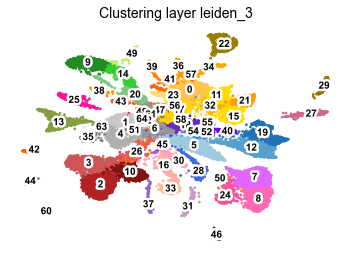

In [ ]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color=clusteringlayer, legend_loc='on data', legend_fontoutline = 5,
               title= 'Clustering layer '+str(clusteringlayer), size = 30,
               palette = df['Colour'].to_list(),
               frameon=False)

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


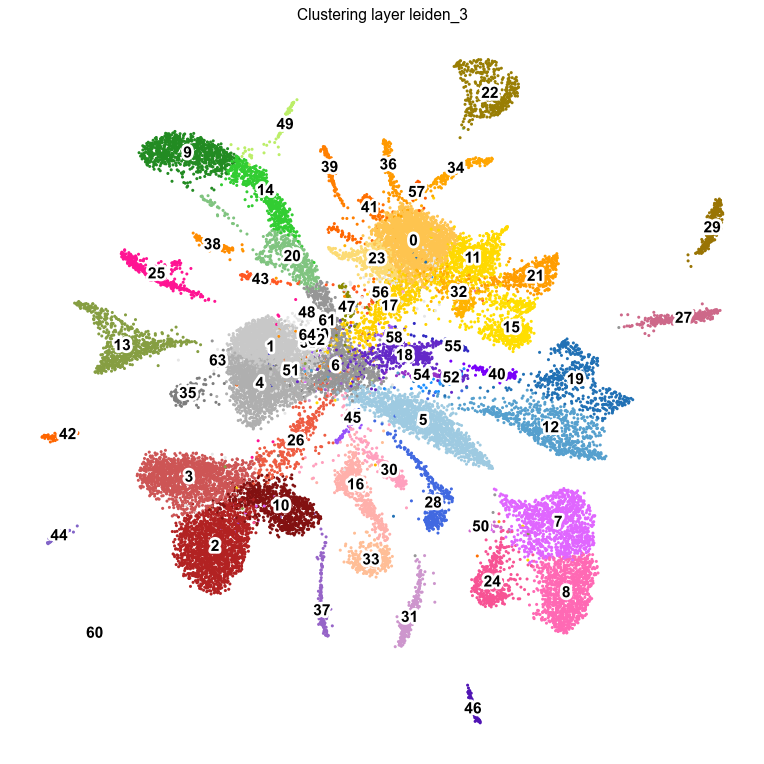

In [ ]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color=clusteringlayer, legend_loc='on data', legend_fontoutline = 5,
               title= 'Clustering layer '+str(clusteringlayer), size = 30,
               #palette = df['Colour'].to_list(),
               frameon=False)

In [ ]:
for i in adata.obs.index:
    adata.obs.loc[i, 'leiden_3_names'] = df['Cluster name'][adata.obs.loc[i, clusteringlayer]]
    adata.obs.loc[i, 'broad_names'] = df['Broad group'][adata.obs.loc[i, clusteringlayer]]

In [ ]:
adata.obs

,Size,Library,Sample,n_counts,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden_1,leiden_2,leiden_3,leiden_4,leiden_3_names,broad_names
L23_1_CATCAAGTGAACAGGCGTCTGTCA,L,L1,L_L1,295.0,255,255,295.0,0.0,0.0,2,7,8,9,pgrn+ parenchymal cells 2,parenchymal
L23_1_AACGCTTAACACAGAAAAGACGGA,L,L1,L_L1,125.0,117,117,125.0,0.0,0.0,10,17,16,19,protonephridia proximal tubule cells,protonephridia
L23_1_AGTCACTAGAACAGGCCGGATTGC,M,L1,M_L1,480.0,348,348,480.0,0.0,0.0,1,0,1,0,neoblasts 1,neoblasts
L23_1_CCGTGAGAGCTAACGACGCATACA,M,L1,M_L1,668.0,510,510,668.0,0.0,0.0,3,27,26,26,muscle progenitors,muscle
L23_1_CGACTGGAATAGCGACTATCAGCA,M,L1,M_L1,267.0,240,240,267.0,0.0,0.0,3,15,18,65,secretory 1,secretory
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
L23_2_CCGAAGTACCTCTATCAACGCTTA,M,L2,M_L2,706.0,576,576,706.0,0.0,0.0,12,42,43,47,pkd-1+ neurons,neurons
L23_2_CGAACTTAACCTCCAACCGTGAGA,M,L2,M_L2,724.0,508,508,724.0,0.0,0.0,1,0,1,0,neoblasts 1,neoblasts
L23_2_ACAGCAGATCTTCACAAGATGTAC,L,L2,L_L2,174.0,153,153,174.0,0.0,0.0,21,28,30,32,protonephridia flame cells,protonephridia
L23_2_AAACATCGATGCCTAACATACCAA,L,L2,L_L2,336.0,275,275,336.0,0.0,0.0,8,19,19,43,epidermis,epidermal


In [ ]:
adata.obs['leiden_3_names']

L23_1_CATCAAGTGAACAGGCGTCTGTCA               pgrn+ parenchymal cells 2
L23_1_AACGCTTAACACAGAAAAGACGGA    protonephridia proximal tubule cells
L23_1_AGTCACTAGAACAGGCCGGATTGC                             neoblasts 1
L23_1_CCGTGAGAGCTAACGACGCATACA                      muscle progenitors
L23_1_CGACTGGAATAGCGACTATCAGCA                             secretory 1
                                                  ...                 
L23_2_CCGAAGTACCTCTATCAACGCTTA                          pkd-1+ neurons
L23_2_CGAACTTAACCTCCAACCGTGAGA                             neoblasts 1
L23_2_ACAGCAGATCTTCACAAGATGTAC              protonephridia flame cells
L23_2_AAACATCGATGCCTAACATACCAA                               epidermis
L23_2_CAGCGTTACGACTGGATATCAGCA                          pkd-2+ neurons
Name: leiden_3_names, Length: 28738, dtype: category
Categories (65, object): ['chat+ neurons 1', 'neoblasts 1', 'body wall muscle', 'intestinal and DV muscle', ..., 'unannotated 7', 'unannotated 8', 'unannotated 9', 'u

In [ ]:
df['Cluster name'].to_list()

['chat+ neurons 1',
 'neoblasts 1',
 'body wall muscle',
 'intestinal and DV muscle',
 'neoblasts 2',
 'early epidermal progenitors',
 'committed neoblasts',
 'pgrn+ parenchymal cells 1',
 'pgrn+ parenchymal cells 2',
 'phagocytes',
 'muscle pharynx',
 'chat+ neurons 2',
 'late epidermal progenitors',
 'basal cells',
 'phagocyte progenitors 2',
 'th+ neurons',
 'protonephridia proximal tubule cells',
 'neuronal progenitors',
 'secretory 1',
 'epidermis',
 'phagocyte progenitors 1',
 'celsr-1+ neurons',
 'otf+ neurons 1',
 'trpa-1+ neurons',
 'ldlrr+ parenchymal cells',
 'psap+ parenchymal cells',
 'muscle progenitors',
 'pigment cells',
 'pharynx cell type',
 'otf+ neurons 2',
 'protonephridia flame cells',
 'aqp+ parenchymal cells',
 'pkd-2+ neurons',
 'protonephridia distal tubule cells',
 'para+ neurons',
 'germ cell progenitors',
 'tph+ neurons',
 'secretory 2',
 'trpm-2-1+ neurons',
 'tinc+ neurons',
 'secretory 5',
 'trpm-2-2+ neurons',
 'gabrb-3+ neurons',
 'pkd-1+ neurons',
 's

In [ ]:
adata.obs['leiden_3_names'] = adata.obs['leiden_3_names'].astype('category')

In [ ]:
adata.obs['leiden_3_names'].cat.set_categories(df['Cluster name'].to_list(), inplace=True)

C:\Users\p0084975\Anaconda3\lib\site-packages\pandas\core\arrays\categorical.py:2747: FutureWarning: The `inplace` parameter in pandas.Categorical.set_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  res = method(*args, **kwargs)


In [ ]:
adata.obs['leiden_3_names']

L23_1_CATCAAGTGAACAGGCGTCTGTCA               pgrn+ parenchymal cells 2
L23_1_AACGCTTAACACAGAAAAGACGGA    protonephridia proximal tubule cells
L23_1_AGTCACTAGAACAGGCCGGATTGC                             neoblasts 1
L23_1_CCGTGAGAGCTAACGACGCATACA                      muscle progenitors
L23_1_CGACTGGAATAGCGACTATCAGCA                             secretory 1
                                                  ...                 
L23_2_CCGAAGTACCTCTATCAACGCTTA                          pkd-1+ neurons
L23_2_CGAACTTAACCTCCAACCGTGAGA                             neoblasts 1
L23_2_ACAGCAGATCTTCACAAGATGTAC              protonephridia flame cells
L23_2_AAACATCGATGCCTAACATACCAA                               epidermis
L23_2_CAGCGTTACGACTGGATATCAGCA                          pkd-2+ neurons
Name: leiden_3_names, Length: 28738, dtype: category
Categories (65, object): ['chat+ neurons 1', 'neoblasts 1', 'body wall muscle', 'intestinal and DV muscle', ..., 'unannotated 7', 'unannotated 8', 'unannotated 9', 'u

C:\Users\p0084975\Anaconda3\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


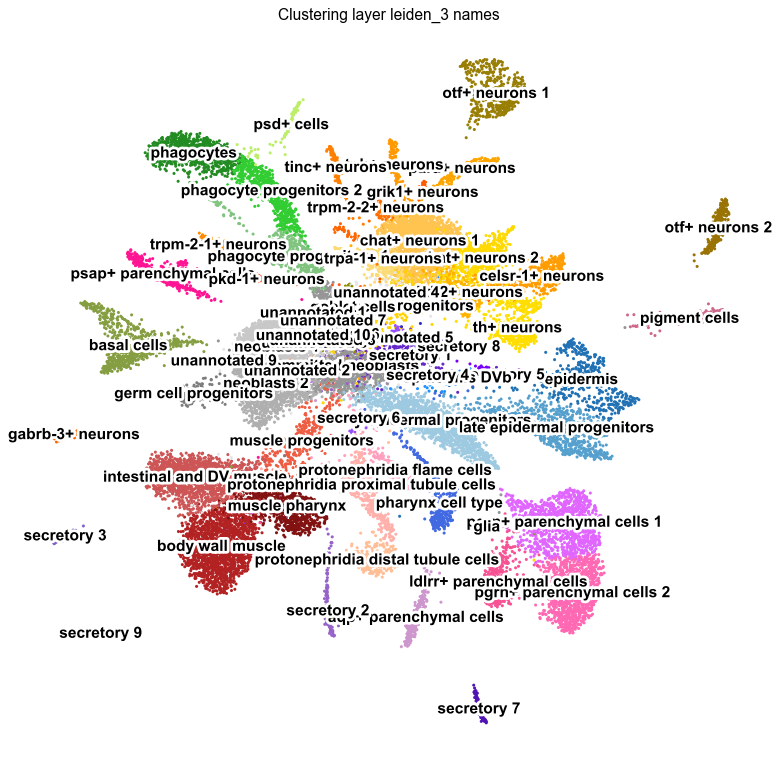

In [ ]:
with rc_context({'figure.figsize': (12, 12)}):
    sc.pl.umap(adata, color='leiden_3_names', legend_loc='on data', legend_fontoutline = 5,
               title= 'Clustering layer '+str(clusteringlayer)+ ' names', size = 30,
               palette = df['Colour'].to_list(),
               frameon=False)

In [ ]:
adata.write(results_file)